In [5]:
using Gadfly
using RDatasets

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/michel/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


#### Plotting using themes

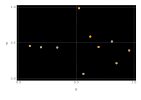

In [6]:
dark_panel = Theme(
    panel_fill=colorant"black",
    default_color=colorant"orange"
)

plot(x=rand(10), y=rand(10), dark_panel)

#### Plotting orange themes

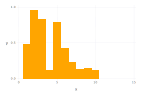

In [7]:
Gadfly.get_theme(::Val{:orange}) =
    Theme(default_color=colorant"orange")

Gadfly.with_theme(:orange) do
  plot(x=[1:10;], y=rand(10), Geom.bar)
end

In [8]:
Gadfly.push_theme(:dark)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping at dataframes.jl:96 [inlined]
└ @ Core /home/michel/.julia/packages/Gadfly/09PWZ/src/dataframes.jl:96


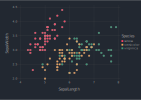

In [9]:
plot(dataset("datasets", "iris"),
    x="SepalLength", y="SepalWidth", color="Species", Geom.point)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping(::DataFrame, ::Symbol) at dataframes.jl:96
└ @ Gadfly /home/michel/.julia/packages/Gadfly/09PWZ/src/dataframes.jl:96


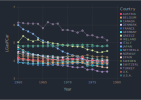

In [10]:
using RDatasets

gasoline = dataset("Ecdat", "Gasoline")

plot(gasoline, x=:Year, y=:LGasPCar, color=:Country,
         Geom.point, Geom.line)

In [11]:
Gadfly.push_theme(:orange)

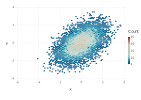

In [12]:

using Distributions

X = rand(MultivariateNormal([0.0, 0.0], [1.0 0.5; 0.5 1.0]), 10000);
plot(x=X[1,:], y=X[2,:], Geom.hexbin(xbincount=100, ybincount=100))

#### Plotting Rendering pipeline

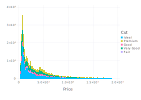

In [13]:
df = dataset("ggplot2", "diamonds")
p = plot(df,
     x = :Price, color = :Cut,
     Stat.histogram,
     Geom.bar)

┌ Warning: `ColorKey(title)` is deprecated, use `ColorKey(title=title)` instead.
│   caller = top-level scope at In[16]:1
└ @ Core In[16]:1


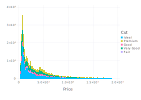

In [16]:
p = plot(layer(df,
               x = :Price, color = :Cut,
         Stat.histogram,
         Geom.bar),
     Scale.x_continuous,
     Scale.color_discrete,
     Coord.cartesian,
     Guide.xticks, Guide.yticks,
     Guide.xlabel("Price"),
     Guide.colorkey("Cut"))

#### Plotting Bar

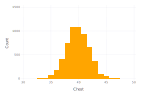

In [15]:
plot(dataset("HistData", "ChestSizes"), x="Chest", y="Count", Geom.bar)